In [ ]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import glob
import math
from numpy.lib.shape_base import split
# %matplotlib inline uncomment this line if you're running this notebook on your local PC

### Question 1: Affine transformations

Apply the following chain of transformations on the generated coordinates:

1. Rotation by 30 degrees.
2. Translation of x coordinate by -1 units and y coordinate by 1 units.
3. Scaling by 2 units.
4. Rotation by 30 degrees.


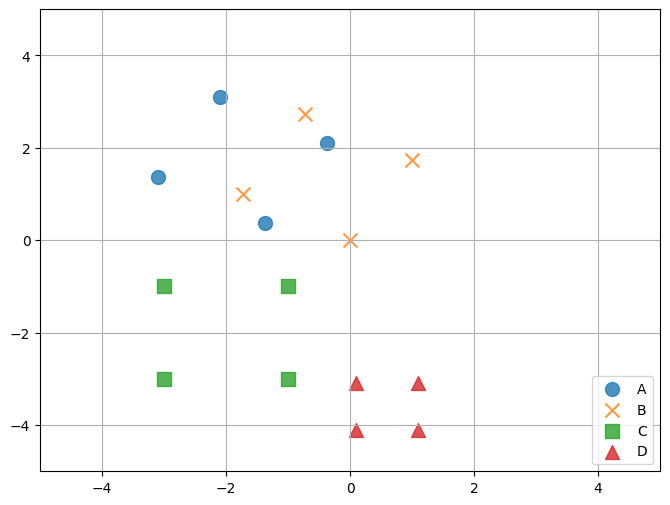
The following figure represents 5 different set of points(each in different color) plotted on a cartesian plane. \\
One of them is the correct output that will be produced when we apply the transformations mentioned above to the given input. \\
Which of the following is the correct output which is produced after applying these transformations?

1. A
2. B
3. C
4. D

In [ ]:
# DO NOT CHANGE THIS CODE
np.random.seed(10)

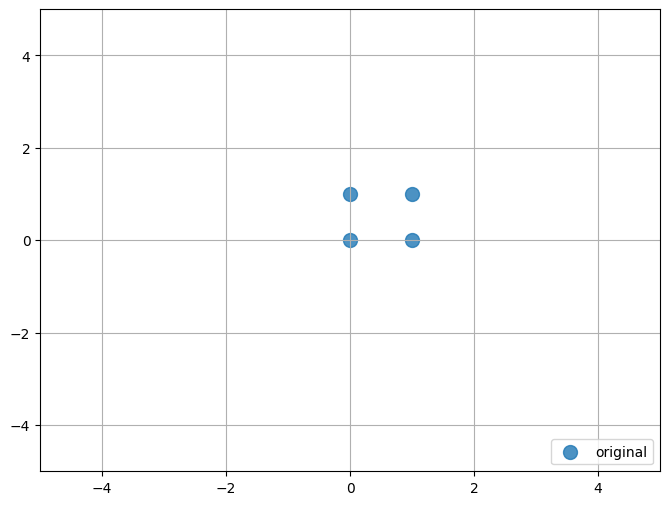

In [ ]:
#defining two functions to build a grid and display it in a plot
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    # coords[0,2] = 2
    # coords[1,1] = 2
    # coords[0,3] = 2
    # coords[1,3] = 2
    return np.vstack((coords, np.ones(coords.shape[1]))).astype(int) if homogenous else coords

def grid_plotter(points, labels):
    markers = ['o', 'x', 's', '^', 'p', 'v']
    fig, ax = plt.subplots(figsize=(8,6))
    for i, p in enumerate(points):
        x, y = p[0], p[1]
        ax.scatter(x, y, label=labels[i], marker=markers[i], alpha=0.8, s=100)
    ax.legend(loc='lower right')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    ax.grid(True)
    plt.show()

#function to display the plotted graph
def show_image(image):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.imshow(image)
    plt.show()

#generated coordinates
coords = get_grid(2, 2, homogenous=True)

# Get sample coordinates
# The output of the grid plotter shows how the sample points are scattered in the cartesian plane
grid_plotter(np.array([coords]),
             labels=['original'])

In [ ]:
# Defining a function to rotate the given set of points
def get_rotation(angle):
    '''
    Input arguments:
    - angle : The angle with which the points should be rotated

    Outputs:
    - rotation matrix : A rotation matrix (numpy array) with the given input angle

    '''
    ### YOUR CODE STARTS HERE

    #convert the angle input to radians

    # construct a rotation matrix with the given angle in the form of a numpy array and return it
    # Hint: recall lecture 1 of week 3 to construct the matrix

    ### YOUR CODE ENDS HERE
    angle = np.radians(angle)

    # construct a rotation matrix with the given angle in the form of a numpy array and return it
    # Hint: recall lecture 1 of week 3 to construct the matrix
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

# Defining a function to translate the given set of points
def get_translation(tx, ty):
    '''
    Input arguments:
    - tx, ty : Units by which the x and y coordinates should be translated

    Outputs:
    - translation matrix : A translation matrix (numpy array) with the given inputs

    '''

    ### YOUR CODE STARTS HERE

    # construct a translation matrix with the given input units in the form of a numpy array and return it
    # Hint: recall lecture 1 of week 3 to construct the matrix


    ### YOUR CODE ENDS HERE
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def get_scale(s):
    '''
    Input arguments:
    - s : Amount by which the coordinates should be scaled by

    Outputs:
    - scaling matrix : A scaling matrix (numpy array) with the given inputs

    '''

    ### YOUR CODE STARTS HERE

    # construct a scaling matrix with the given input units in the form of a numpy array and return it
    # Hint: recall lecture 1 of week 3 to construct the matrix

    ### YOUR CODE ENDS HERE

    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])

In [ ]:
# Creating sample rotation, translation and scaling matrices
R1 = get_rotation(30)
T1 = get_translation(-1, 1)
S1 = get_scale(2)

### YOUR CODE STARTS HERE

# Apply the following transformation
# Rotation -> Translation -> Scaling -> Rotation"
coords1 = R1 @ T1 @ S1@ R1@coords

### YOUR CODE ENDS HERE

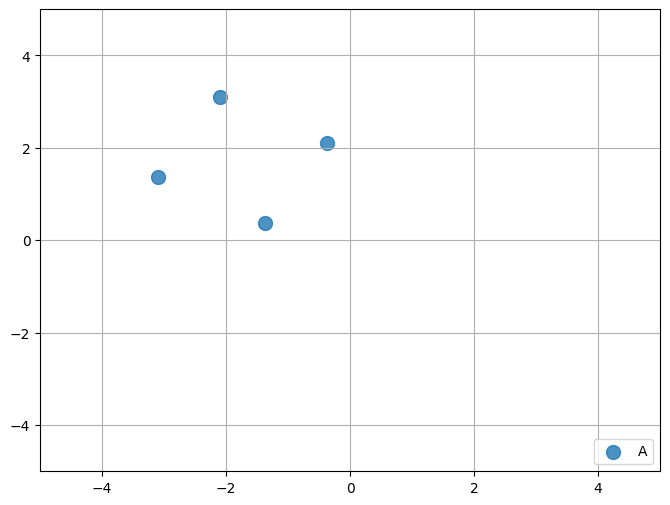

In [ ]:
coords1 = R1 @ T1 @ S1@ R1@coords
##code to generate the plot given in the image

grid_plotter(np.array([coords1]),
             labels=['A'])

### Question 2: Distance between 2 transformed points
Apply the transformations as mentioned in the comments of the next code block to coords and calculate the mean of the euclidean distances between the points.

What is the floor value of the mean?

1. 1
2. 5
3. 2
4. 0


In [ ]:
### YOUR CODE STARTS HERE

#apply the following chain of transformations R1 -> S1 -> T1 to coords and name it coords_1
coords_1 = R1 @ S1 @ T1 @ coords

#apply the following chain of transformations T1 -> R1 -> S1-> T1 to coords and name it coords_2
coords_2 = T1 @ R1@S1@ T1 @ coords

#split them to individual points, there are 4 different points in the form of (xi, yi, zi) in each of the
#transformed coordinates as calculated above
split_1 = np.split(coords_1, coords_1.shape[1], axis=1)
split_2 = np.split(coords_2, coords_2.shape[1], axis=1)

#calculate the euclidean distances between each of those points in coords_1 and coords_2
# Hint: distance is d(point1 of coords_1, point1_coords2)
# Take the mean of the distances and at last take the floor of the value and mark your answer

#calculating the euclidean distances in a pair wise fashion
dist = []
for i in range(0, len(split_1)):
  dist.append(np.linalg.norm(split_1[i] - split_2[i]))

#calculating the mean and taking the floor value of it
mean_value = np.mean(np.array(dist))
np.floor(mean_value)



### YOUR CODE ENDS HERE

1.0

### Question 3: Bag of visual words (BOVW)

Follow the below mentioned steps:\
Step 1. Given a folder of images, use SIFT to extract their feature descriptors.\
Step 2. Perform k-means clustering on the extracted descriptors.\
Step 3. Create histograms by taking help of the clusters calculated in the previous step.\
Step 4. Estimate 5 nearest neighbours to a given image and add the distances of those 5 neighbours.


What is the range of the sum as calculated in step 4?

1. 0 - 200
2. 200 - 400
3. 400 - 600
4. 600 - 800

In [ ]:
# defining a feature extractor that we want to use
# in this case, we will use SIFT
extractor = cv2.xfeatures2d.SIFT_create()

# defining a function to extract the keypoints and descriptors for a given image
def features(image, extractor):
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

# implementing a histogram building function which takens in the clustering algorithm
# and returns a histogram
def build_histogram(descriptor, cluster_alg):

    # defining a place holder for the histogram, with the number of bins being
    # equal to the number of cluster centres
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor)

    ### YOUR CODE STARTS HERE

    # for all the centres that are returned in the above line,
    # increase their bin value by 1 in the histogram array
    for i in cluster_result:
        histogram[i] += 1.0

    ### YOUR CODE ENDS HERE

    return histogram

def extract_descriptors(images, extractor):
    #iterate over the list of images and extract descriptors
    descriptor_list = []
    for image in images:

        ### YOUR CODE STARTS HERE
        # pass the image and the extractor to the features function
        # defined in the above lines
        keypoint, descriptor = features(image, extractor)

        # append the descriptors to the descriptor_list
        descriptor_list.append(descriptor)

    # vertically stack all the elements of the list
    # using np.vstack()
    descriptors=descriptor_list[0]

    for descriptor in descriptor_list[1:]:
        descriptors=np.vstack((descriptors,descriptor))

        ### YOUR CODE ENDS HERE

    descriptors_float = descriptors.astype(float)

    return descriptors_float

Upload the assignment3_content.zip file provided to colab and run the cell below to extract the data files required for next question

In [ ]:
!unzip assignment3_content.zip

Archive:  assignment3_content.zip
replace assignment3_content/sample_images/Black_Capped_Vireo_0020_797461.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
### YOUR CODE STARTS HERE

#read all the images present in the sample images folder
# and store them in an array
#hint: read them using cv2.imread()
filenames = [img for img in glob.glob("assignment3_content/sample_images/*.jpg")]
#filenames = [img for img in glob.glob("sample_images/*.jpg")]

print
images = []
for img in filenames:
    n= cv2.imread(img)
    # n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
    images.append(n)

### YOUR CODE ENDS HERE

# extract all the descriptors using the extract_descriptors function
descriptors_float = extract_descriptors(images, extractor)

#use the kmeans clustering algorithm and cluster
#the descriptors extracted in the above line
kmeans = KMeans(n_clusters = 100, random_state=0)
kmeans.fit(descriptors_float)


histograms_images = []

### YOUR CODE STARTS HERE

# iterate over the images list and calculate
# the histograms of the images and append to the
# histograms_images list
for image in images:
    keypoint, descriptor = features(image, extractor)
    descriptor = descriptor.astype(float)

    if (descriptor is not None):
        histogram = build_histogram(descriptor, kmeans)

        histograms_images.append(histogram)

### YOUR CODE ENDS HERE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# using the nearest neighbors algorithm
neighbor = NearestNeighbors(n_neighbors = 5)
neighbor.fit(histograms_images)


data = cv2.imread('assignment3_content/White_Pelican_0072_96975.jpg')
# data = cv2.imread('White_Pelican_0072_96975.jpg')


# pass the data to the features function and
# build the histogram for it using the build_histogram
# function
keypoint, descriptor = features(data, extractor)
descriptor = descriptor.astype(float)
histogram = build_histogram(descriptor, kmeans)

# estimate the 5 nearest neighbors and get their distances
dist, result = neighbor.kneighbors([histogram])

### YOUR CODE STARTS HERE
# sum the values in the dist array
# mark the answer for the question 2 using the output
np.sum(dist)

### YOUR CODE ENDS HERE

337.53306697678136

If you observe closely, the test image is a pelican but the nearest neighbors are not pelicans. Our method does not correctly identify the neighbors. This is the drawback of Bag of Visual Words. All the local features are encoded into a single code vector ignoring the position of the feature descriptors. This results in the loss of spatial information between words in the final code vector. Thus, to incorporate the spatial information into the final code vector, we can apply Spatial Pyramid Matching.